In [1]:
from gw_from_binary import *
import numpy as np

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] #+ plt.rcParams["font.serif"]
plt.rcParams["font.size"]=15
plt.rcParams["figure.figsize"]=(5,3.5)
plt.rcParams["xtick.direction"]="in"
plt.rcParams["ytick.direction"]="in"
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.handletextpad'] = 0.2
plt.rcParams['legend.handlelength'] = 1.2
plt.rcParams['legend.borderpad'] = 0.2
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.columnspacing'] = 0.5
plt.rcParams['legend.framealpha'] = 0.9
#from model_file import *

In [3]:
import ptarcade

ModuleNotFoundError: No module named 'ptarcade'

In [4]:
# #from model_file import *
# i = 1
# j = 17
# k = 19
# l = 20 
# m = 19
# plt.loglog(fgwr,dEdfgw_mesh[i,j,k,l,m])
# print(rho_all[i],gamma_all[j],e0_all[k],M_all[l],q_all[m])

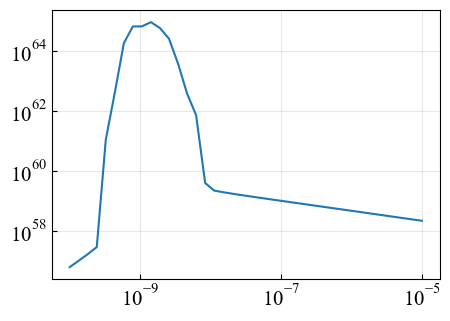

In [3]:
# orbit1 = orbit(rho_multiplier=rho_all[i] , gamma = gamma_all[j] , e0=e0_all[k] ,\
#                 Mbh=M_all[l]*Msun , q=q_all[m] ,initial_condition="influence_radius",reverse_integration=1)
# plt.loglog(fgwr,orbit1.dEdfgw(fgwr))

# Do integration

#pc,yr# 

4.179e+08


/var/folders/vm/3q3c_ztd0xbb_8nnsw9q8s2h0000gp/T/ipykernel_91456/1252847678.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/vm/3q3c_ztd0xbb_8nnsw9q8s2h0000gp/T/ipykernel_91456/1252847678.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


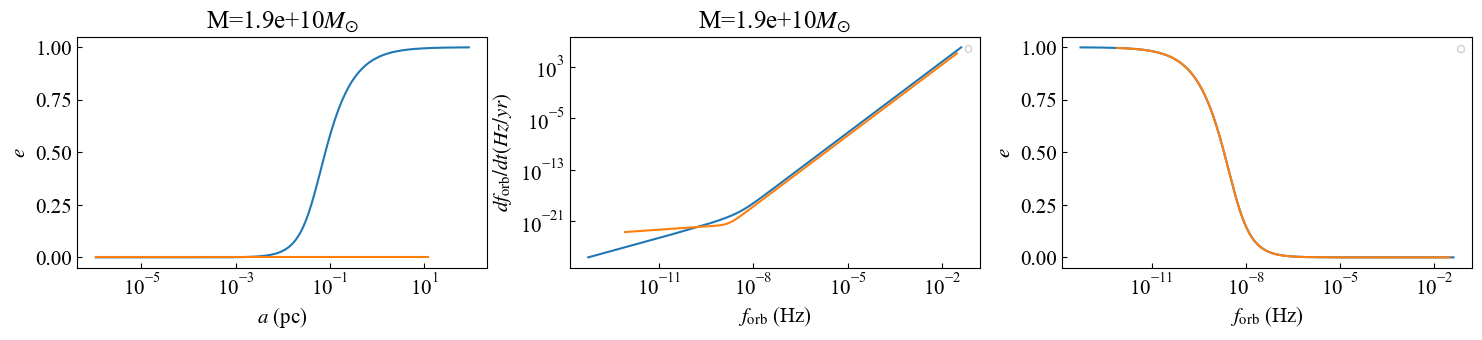

In [7]:
Mbh = 9.6e8 * Msun 
q = 1 
Mc = Mbh * (q/(1+q)**2)**(3/5)
einf = 0.16
gamma = 1
rho_multiplier = 1e-4
print("%.3e"%(Mc/Msun))


orbit1 = orbit(rho_multiplier=1e-9 , gamma = 1.5 , e0=0.95 , Mbh=18552832672.189957*Msun , q=0.9 ,initial_condition="1pc",reverse_integration=100)
orbit2 = orbit(rho_multiplier=1e3/2 , gamma = 1.5 , e0=0.0 , Mbh=1e10*Msun , q=0.9 ,initial_condition="influence_radius")
# orbit1 = orbit(rho_multiplier=rho_all[i] , gamma = gamma_all[j] , e0=e0_all[k] ,\
#                 Mbh=M_all[l]*Msun , q=q_all[m] ,initial_condition="influence_radius",reverse_integration=1)
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
plt.plot(orbit1.a_all/pc  , orbit1.e_all ,label=r"$\rho_{1pc} / \rho_{1pc,ref} = $%.1e"%orbit1.rho_multiplier)
plt.plot(orbit2.a_all/pc  , orbit2.e_all ,label=r"$\rho_{1pc} / \rho_{1pc,ref} = $%.1e"%orbit2.rho_multiplier)
#print(orbit1.e_all.max())
#plt.scatter(orbit1.aref/pc,orbit1.eref,c='red',zorder=3,s=50)

plt.xscale("log")

#plt.legend()
plt.xlabel(r"$a$ (pc)")
plt.ylabel(r"$e$")
plt.grid()
plt.title(f"M={orbit1.Mbh/Msun:.1e}"+r"$M_{\odot}$")

plt.subplot(1,3,2)
plt.loglog( orbit1.forb_dense , orbit1.dforbr_dt_forbr(orbit1.forb_dense))
plt.loglog( orbit2.forb_dense , orbit2.dforbr_dt_forbr(orbit2.forb_dense))
plt.legend()
plt.xlabel(r"$f_{\rm orb}$ (Hz)")
plt.ylabel(r"$df_{\rm orb}/dt (Hz/yr)$")

plt.grid()
plt.title(f"M={orbit1.Mbh/Msun:.1e}"+r"$M_{\odot}$")

plt.subplot(1,3,3)
plt.plot( orbit1.forb_dense , orbit1.e_forb(orbit1.forb_dense) )
plt.plot( orbit2.forb_dense , orbit1.e_forb(orbit2.forb_dense) )
plt.xscale("log")
plt.legend()
plt.xlabel(r"$f_{\rm orb}$ (Hz)")
plt.ylabel(r"$e$")
plt.grid()

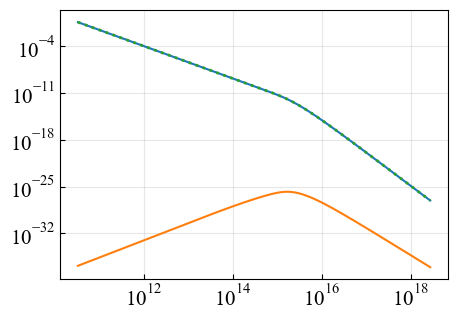

In [9]:
a = orbit1.dedt_gw_We(orbit1.a_all,orbit1.e_all)
b = orbit1.dedt_3b_We(orbit1.a_all,orbit1.e_all)


plt.plot(orbit1.a_all, -a )

plt.plot(orbit1.a_all, b )
plt.plot(orbit1.a_all, -a+b , lw=2,ls=":" )
plt.xscale("log")
plt.yscale("log")

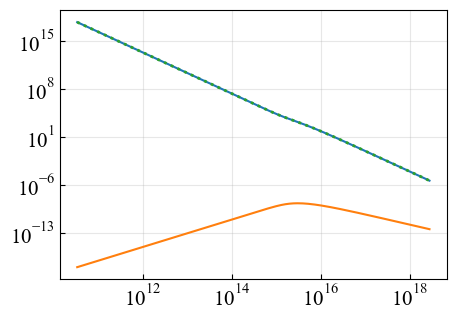

In [10]:
cc = orbit1.dadt_gw_We(orbit1.a_all,orbit1.e_all)
d = orbit1.dadt_3b_We(orbit1.a_all,orbit1.e_all)
plt.plot(orbit1.a_all, -cc )
plt.plot(orbit1.a_all, -d)
plt.loglog(orbit1.a_all, -cc-d , lw=2,ls=":" )
plt.xscale("log")
plt.yscale("log")

In [11]:
orbit1 = orbit(rho_multiplier=1e-61 , gamma = 0 , e0=0.0 , Mbh=1e9*Msun , q=0.9 ,initial_condition="1pc",reverse_integration=1)
orbit2 = orbit(rho_multiplier=1e-61 , gamma = 0 , e0=0.9 , Mbh=1e9*Msun , q=0.9 ,initial_condition="1pc",reverse_integration=1)
orbit3 = orbit(rho_multiplier=1e-61 , gamma = 0 , e0=0.97 , Mbh=1e9*Msun , q=0.9 ,initial_condition="1pc",reverse_integration=1)

orbit4 = orbit(rho_multiplier=7 , gamma = 0 , e0=0.0 , Mbh=1e9*Msun , q=0.9 ,initial_condition="1pc")
orbit5 = orbit(rho_multiplier=692*100 , gamma = 0 , e0=0.0 , Mbh=1e9*Msun , q=0.9 ,initial_condition="1pc")

orbit6 = orbit(rho_multiplier=7 , gamma = 0 , e0=0.9 , Mbh=1e9*Msun , q=0.9 ,initial_condition="1pc")
orbit7 = orbit(rho_multiplier=692*100 , gamma = 0 , e0=0.9 , Mbh=1e9*Msun , q=0.9 ,initial_condition="1pc")

orbit8 = orbit(rho_multiplier=7 , gamma = 0 , e0=0.97 , Mbh=1e9*Msun , q=0.9 ,initial_condition="1pc")
orbit9 = orbit(rho_multiplier=692*100 , gamma = 0 , e0=0.97 , Mbh=1e9*Msun , q=0.9 ,initial_condition="1pc")

/var/folders/vm/3q3c_ztd0xbb_8nnsw9q8s2h0000gp/T/ipykernel_91456/3772750962.py:26: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.loglog( fgw*1e9, np.sqrt( hc21 ) ,'-',label=r"$e_{\rm pc}$ = %.0f, $\frac{\rho_{\rm i}/\sigma_{\rm i}}{\overline{\rho_{\rm ref}}/\overline{\sigma}_{\rm ref}} = %.0f$"%(orbit4.e0,rhosig),\
/var/folders/vm/3q3c_ztd0xbb_8nnsw9q8s2h0000gp/T/ipykernel_91456/3772750962.py:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.loglog( fgw*1e9, np.sqrt( hc21 ) ,'-',label=r"$e_{\rm pc}$ = %.0f, $\frac{\rho_{\rm i}/\sigma_{\rm i}}{\overline{\rho_{\rm ref}}/\overline{\sigma}_{\rm ref}} = %.0f$"%(orbit5.e0,rhosig),\
/var/folders/vm/3q3c_ztd0xbb_8nnsw9q8s2h0000gp/T/ipykernel_91456/3772750962.py:40: UserWarning: linestyle is r

10003.368166566048


/var/folders/vm/3q3c_ztd0xbb_8nnsw9q8s2h0000gp/T/ipykernel_91456/3772750962.py:61: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.loglog( fgw*1e9, np.sqrt( hc21 ) ,'-',label=r"$e_{\rm pc}$ = %.2f, $\frac{\rho_{\rm i}/\sigma_{\rm i}}{\overline{\rho_{\rm ref}}/\overline{\sigma}_{\rm ref}} = %.0f$"%(orbit9.e0,rhosig),\


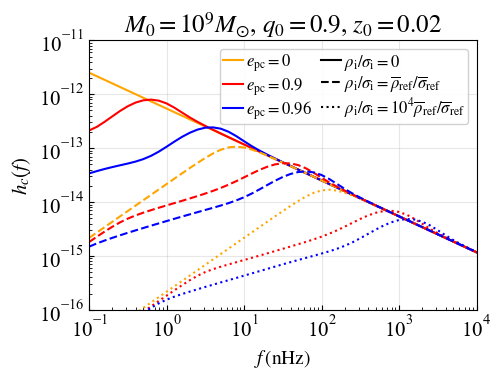

In [12]:
from matplotlib.lines import Line2D

z = 0.02
fgw = np.logspace(-10,-5,51)
fgwr = fgw * (1+z)
hc2_factor = 4 * G  / ( np.pi * c**2 * fgw * (1e6*pc)**3 )


dEdfgw_total   = orbit1.dEdfgw(fgwr,ncut=100)
hc21 =  hc2_factor * dEdfgw_total
plt.loglog( fgw*1e9, np.sqrt( hc21 ) ,'-',label=r"$e_{\rm pc}$ = %.2f"%(orbit1.e0),color='orange' ,lw=1.5)

dEdfgw_total   = orbit2.dEdfgw(fgwr,ncut=100)
hc21 =  hc2_factor * dEdfgw_total
plt.loglog( fgw*1e9, np.sqrt( hc21 ) ,'-',label=r"$e_{\rm pc}$ = %.2f"%(orbit2.e0),color='red' ,lw=1.5)

dEdfgw_total   = orbit3.dEdfgw(fgwr,ncut=100)
hc21 =  hc2_factor * dEdfgw_total
plt.loglog( fgw*1e9, np.sqrt( hc21 ) ,'-',label=r"$e_{\rm pc}$ = %.2f"%(orbit3.e0),color='blue' ,lw=1.5)



dEdfgw_total   = orbit4.dEdfgw(fgwr,ncut=100)
hc21 =  hc2_factor * dEdfgw_total
rhosig = orbit4.rhosig_init / (1e5 * Msun/pc**3 / (1e-3 *c ))
plt.loglog( fgw*1e9, np.sqrt( hc21 ) ,'-',label=r"$e_{\rm pc}$ = %.0f, $\frac{\rho_{\rm i}/\sigma_{\rm i}}{\overline{\rho_{\rm ref}}/\overline{\sigma}_{\rm ref}} = %.0f$"%(orbit4.e0,rhosig),\
           color='orange',ls="--" ,lw=1.5)

dEdfgw_total   = orbit5.dEdfgw(fgwr,ncut=100)
hc21 =  hc2_factor * dEdfgw_total
rhosig = orbit5.rhosig_init / (1e5 * Msun/pc**3 / (1e-3 *c ))
plt.loglog( fgw*1e9, np.sqrt( hc21 ) ,'-',label=r"$e_{\rm pc}$ = %.0f, $\frac{\rho_{\rm i}/\sigma_{\rm i}}{\overline{\rho_{\rm ref}}/\overline{\sigma}_{\rm ref}} = %.0f$"%(orbit5.e0,rhosig),\
           color='orange',ls=":" ,lw=1.5)



dEdfgw_total   = orbit6.dEdfgw(fgwr,ncut=100)
hc21 =  hc2_factor * dEdfgw_total
rhosig = orbit6.rhosig_init / (1e5 * Msun/pc**3 / (1e-3 *c ))
plt.loglog( fgw*1e9, np.sqrt( hc21 ) ,'-',label=r"$e_{\rm pc}$ = %.2f, $\frac{\rho_{\rm i}/\sigma_{\rm i}}{\overline{\rho_{\rm ref}}/\overline{\sigma}_{\rm ref}} = %.0f$"%(orbit6.e0,rhosig),\
           color='red',ls="--" ,lw=1.5)

dEdfgw_total   = orbit7.dEdfgw(fgwr,ncut=100)
hc21 =  hc2_factor * dEdfgw_total
rhosig = orbit7.rhosig_init / (1e5 * Msun/pc**3 / (1e-3 *c ))
plt.loglog( fgw*1e9, np.sqrt( hc21 ) ,'-',label=r"$e_{\rm pc}$ = %.2f, $\frac{\rho_{\rm i}/\sigma_{\rm i}}{\overline{\rho_{\rm ref}}/\overline{\sigma}_{\rm ref}} = %.0f$"%(orbit7.e0,rhosig),\
           color='red',ls=":" ,lw=1.5)



dEdfgw_total   = orbit8.dEdfgw(fgwr,ncut=100)
hc21 =  hc2_factor * dEdfgw_total
rhosig = orbit8.rhosig_init / (1e5 * Msun/pc**3 / (1e-3 *c ))
plt.loglog( fgw*1e9, np.sqrt( hc21 ) ,'-',label=r"$e_{\rm pc}$ = %.2f, $\frac{\rho_{\rm i}/\sigma_{\rm i}}{\overline{\rho_{\rm ref}}/\overline{\sigma}_{\rm ref}} = %.0f$"%(orbit8.e0,rhosig),\
           color='blue',ls="--",lw=1.5 )

dEdfgw_total   = orbit9.dEdfgw(fgwr,ncut=100)
hc21 =  hc2_factor * dEdfgw_total
rhosig = orbit9.rhosig_init / (1e5 * Msun/pc**3 / (1e-3 *c ))
print(rhosig)
plt.loglog( fgw*1e9, np.sqrt( hc21 ) ,'-',label=r"$e_{\rm pc}$ = %.2f, $\frac{\rho_{\rm i}/\sigma_{\rm i}}{\overline{\rho_{\rm ref}}/\overline{\sigma}_{\rm ref}} = %.0f$"%(orbit9.e0,rhosig),\
           color='blue',ls=":" ,lw=1.5 )

plt.grid()
plt.legend(loc=3,fontsize=10)

plt.xlabel(r"$f\,({\rm nHz})$",size=14)
plt.ylabel(r"$h_c(f)$")
plt.title(r"$M_0 = 10^{9}M_{\odot}$, $q_0=0.9$, $z_0=0.02$")
#plt.ylim(1e-16)
# BEGIN: Manually create a legend

legend_elements = [
    Line2D([0], [0], color='orange', lw=1.5, label=r"$e_{\rm pc} = 0$"),
    Line2D([0], [0], color='red', lw=1.5, label=r"$e_{\rm pc} = 0.9$"),
    Line2D([0], [0], color='blue', lw=1.5, label=r"$e_{\rm pc} = 0.96$"),
    Line2D([0], [0], color='black', lw=1.5, ls='-', label=r"$\rho_{\rm i}/\sigma_{\rm i} = 0$"),
    Line2D([0], [0], color='black', lw=1.5, ls='--', label=r"$\rho_{\rm i}/\sigma_{\rm i} = \overline{\rho}_{\rm ref}/\overline{\sigma}_{\rm ref}$"),
    Line2D([0], [0], color='black', lw=1.5, ls=':', label=r"$\rho_{\rm i}/\sigma_{\rm i} = 10^4\overline{\rho}_{\rm ref}/\overline{\sigma}_{\rm ref}$"),
]


plt.legend(handles=legend_elements, loc='best',ncol=2)
#lgd = plt.legend(handles=legend_elements, loc='best', fontsize=11,ncol=2)
# END: Manually create a legend
#plt.legend(fontsize=10,loc=1,ncol=1)
plt.ylim(1e-16,1e-11)
plt.xlim(fgw.min()*1e9,fgw.max()*1e9)
plt.grid()
plt.savefig("one_orbit.pdf",bbox_inches="tight")
